<a href="https://colab.research.google.com/github/hammaad2002/SpeechBrain-Tutorials/blob/main/SpeechBrain_2nd_Tutorial_(What_Can_I_Do_With_SpeechBrain).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

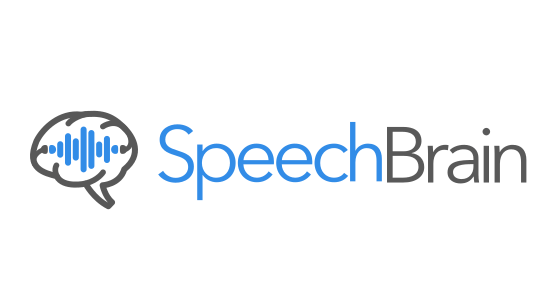

# **What can I do with SpeechBrain?**

SpeechBrain can already do a lot of cool things. You can use SpeechBrain for the following types of problems:

- **speech classification** (many-to-one, e.g. speaker-id)
- **speech regression** (speech-to-speech mapping, e.g, speech enhancement)
- **sequence-to-sequence** (speech to speech mapping, e.g., speech recognition)

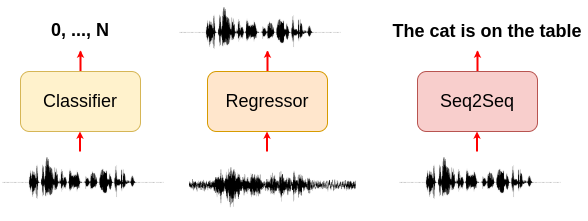

More precisely, SpeechBrain supports the following tasks:
- **Speech Recognition**: Speech-to-text ([see this tutorial](https://colab.research.google.com/drive/1aFgzrUv3udM_gNJNUoLaHIm78QHtxdIz?usp=sharing))
- **Speaker Recognition**: Speaker verification/ID ([see this tutorial](https://colab.research.google.com/drive/1UwisnAjr8nQF3UnrkIJ4abBMAWzVwBMh?usp=sharing)).
- **Speaker Diarization**: Detect who spoke when.
- **Speech Enhancement**: Noisy to clean speech ([see this tutorial](https://colab.research.google.com/drive/18RyiuKupAhwWX7fh3LCatwQGU5eIS3TR?usp=sharing)).
- **Speech Separation**: Separate overlapped speech ([see this tutorial](https://colab.research.google.com/drive/1YxsMW1KNqP1YihNUcfrjy0zUp7FhNNhN?usp=sharing)). 
- **Spoken Language Understanding**: Speech to intent/slots or in other words converting speech into a structured form, such as a set of words, and then analyzing that structured form to extract the intended meaning and intent of the speaker.
- **Multi-microphone processing**: Combining input signals ([see this tutorial](https://colab.research.google.com/drive/1UVoYDUiIrwMpBTghQPbA6rC1mc9IBzi6?usp=sharing)). 

Many other systems are yet to come. For all these tasks we provide recipes that allow users to train a model from scratch. We have made available all the pre-trained model and logs for all the experiments [here](https://drive.google.com/drive/folders/1ZVuROxR711Xib2MsJbcPla4PWqbK1Ddw?usp=sharing).

The standard way to train your model from scratch with SpeechBrain is the following:


```bash
cd recipe/dataset_name/task_name

python train.py train.yaml --data_folder=/path/of/your/data
```

Please, refer to the aforementioned tutorial for more information about training.



 In this brief tutorial, we just show how to use some of the pre-trained models made available on [HuggingFace](https://huggingface.co/speechbrain/). First of all, let's install SpeechBrain:

In [28]:
%%capture
# Local installation
!git clone https://github.com/speechbrain/speechbrain/
%cd /content/speechbrain/
!pip install -r requirements.txt
!pip install -e .

If you prefer, you can use the version available with PyPI:

In [29]:
%%capture
!pip install speechbrain
!pip install transformers

Once installed, you should be able to import the speechbrain project with python:

In [30]:
import speechbrain as sb
from speechbrain.dataio.dataio import read_audio
from IPython.display import Audio

IPython is an interactive command-line shell for Python, which provides enhanced features and functionality for working with Python. IPython includes a number of additional libraries and tools for working with data, including the **IPython.display** module, which provides functions for displaying various types of data in an IPython environment.

An interactive command-line shell is one that allows the user to enter and execute commands in real-time, rather than running a pre-defined set of commands from a script or file. This allows the user to explore and interact with the system in a more flexible and interactive way.

The **Audio** function that is mentioned above is the example of a utility function provided by the IPython.display module. Utility functions are generally defined as functions that are designed to perform a specific task or set of tasks, and they are typically used to simplify or automate a process. In this case, the Audio function is a utility function that can be used to play an audio signal in an IPython environment.

While the **IPython.display** module is primarily designed for use in IPython environments, such as **Jupyter notebooks** or **Colab**, it can also be used in other Python environments, such as scripts or the interactive Python prompt. However, some of the functions in the IPython.display module may not work outside of an IPython environment, or may require additional setup or dependencie

## **Speech Recognition on Different Languages**

### *English*

In [31]:
from speechbrain.pretrained import EncoderDecoderASR

asr_model = EncoderDecoderASR.from_hparams(source="speechbrain/asr-crdnn-rnnlm-librispeech", savedir="pretrained_models/asr-crdnn-rnnlm-librispeech")
asr_model.transcribe_file('speechbrain/asr-crdnn-rnnlm-librispeech/example.wav')

'THE BIRCH CANOE SLID ON THE SMOOTH PLANKS'

In [32]:
signal = read_audio("example.wav").squeeze()
Audio(signal, rate=16000)

Th **squeeze()** is a method of the **numpy** array class that removes dimensions with size 1 from the shape of the array.

The **read_audio()** function reads an audio file and returns the audio signal as a **numpy** array. Depending on the format of the audio file and the specific implementation of the **read_audio()** function, the returned array may have one or more dimensions with size 1. For example, the array may have shape (1, N) or (N, 1), where N is the length of the audio signal.

Calling **squeeze()** on the array removes these dimensions with size 1 and returns a new array with a modified shape. For example, if the input array has shape (1, N), **squeeze()** will return a new array with shape (N,).

## *French*

In [33]:
from speechbrain.pretrained import EncoderDecoderASR

asr_model = EncoderDecoderASR.from_hparams(source="speechbrain/asr-crdnn-commonvoice-fr", savedir="pretrained_models/asr-crdnn-commonvoice-fr")
asr_model.transcribe_file("speechbrain/asr-crdnn-commonvoice-fr/example-fr.wav")

'MON CHIEN EST LE PLUS BEAU'

In [34]:
signal = read_audio("example-fr.wav").squeeze()
Audio(signal, rate=44100)

## *Italian*

In [35]:
from speechbrain.pretrained import EncoderDecoderASR

asr_model = EncoderDecoderASR.from_hparams(source="speechbrain/asr-crdnn-commonvoice-it", savedir="pretrained_models/asr-crdnn-commonvoice-it")
asr_model.transcribe_file("speechbrain/asr-crdnn-commonvoice-it/example-it.wav")

'BUONGIORNO A TUTTI E BENVENUTI A BORDO'

In [36]:
signal = read_audio("example-it.wav").squeeze()
Audio(signal, rate=16000)

## *Mandarin*

In [37]:
from speechbrain.pretrained import EncoderDecoderASR

asr_model = EncoderDecoderASR.from_hparams(source="speechbrain/asr-transformer-aishell", savedir="pretrained_models/asr-transformer-aishell_model")
asr_model.transcribe_file("speechbrain/asr-transformer-aishell/example_mandarin.wav")

'他 应该 也是 喜欢'

In [38]:
signal = read_audio("example_mandarin.wav").squeeze()
Audio(signal, rate=16000)

## **Speech Separation**

We here show a mixture with 2 speakers, but we have a state-of-the-art system for separating mixture with 3 speakers as well. We also have models that deals with noise and reverberation. [See your HuggingFace repository](https://huggingface.co/speechbrain/)

In [39]:
from speechbrain.pretrained import SepformerSeparation as separator

model = separator.from_hparams(source="speechbrain/sepformer-wsj02mix", savedir='pretrained_models/sepformer-wsj02mix')
est_sources = model.separate_file(path='speechbrain/sepformer-wsj02mix/test_mixture.wav') 

In [40]:
signal = read_audio("test_mixture.wav").squeeze()
Audio(signal, rate=8000)

In [41]:
Audio(est_sources[:, :, 0].detach().cpu().squeeze(), rate=8000)

In [42]:
Audio(est_sources[:, :, 1].detach().cpu().squeeze(), rate=8000)

The **detach()** method is a method of the **torch.Tensor** class, which is part of the **PyTorch** library for deep learning. It returns a new tensor that is detached from the current computation graph, which means that it will no longer track gradients or affect the computation of gradients in the graph. This is often used when the tensor is being used for inference or evaluation, rather than for training.

The **cpu()** method is another method of the **torch.Tensor** class, which moves the tensor from the GPU to the CPU. This is often done when the tensor is being used in a context where the GPU is not available or not needed, such as when running on a CPU-only machine or when the tensor is being passed to a function or library that does not support GPU acceleration.

Finally, the **squeeze()** method is a method of the **numpy** array class that removes dimensions with size 1 from the shape of the array. In this case, it is being called on the tensor after it has been moved to the CPU and detached from the computation graph. This is likely being done to remove any unnecessary dimensions from the array and to ensure that it has the correct shape for playback with the Audio function

## **Speech Enhancement**
The goal of speech enhancement is to remove the noise that affects a recording. 
Speechbrain has several systems for speech enhancement. In the following, you can find an example processed by the SepFormer (the version trained to perform enhancement):

In [43]:
from speechbrain.pretrained import SepformerSeparation as separator
import torchaudio

model = separator.from_hparams(source="speechbrain/sepformer-whamr-enhancement", savedir='pretrained_models/sepformer-whamr-enhancement')
enhanced_speech = model.separate_file(path='speechbrain/sepformer-whamr-enhancement/example_whamr.wav') 


In [44]:
signal = read_audio("example_whamr.wav").squeeze()
Audio(signal, rate=8000)

In [45]:
Audio(enhanced_speech[:, :].detach().cpu().squeeze(), rate=8000)

# **Speaker Verification**
The task here is to determine whether two sentences belong to the same speaker or not.

In [46]:
from speechbrain.pretrained import SpeakerRecognition
verification = SpeakerRecognition.from_hparams(source="speechbrain/spkrec-ecapa-voxceleb", savedir="pretrained_models/spkrec-ecapa-voxceleb")
score1, prediction1 = verification.verify_files("speechbrain/spkrec-ecapa-voxceleb/example1.wav", "speechbrain/spkrec-ecapa-voxceleb/example2.flac") #giving two different speaker audio
score2, prediction2 = verification.verify_files("speechbrain/spkrec-ecapa-voxceleb/example1.wav", "speechbrain/spkrec-ecapa-voxceleb/example1.wav")  #giving the same audio

print(prediction1, score1)
print(prediction2, score2)

tensor([False]) tensor([0.1635])
tensor([True]) tensor([1.0000])


In [47]:
signal = read_audio("example1.wav").squeeze()
Audio(signal, rate=16000)

In [48]:
signal = read_audio("example2.flac").squeeze()
Audio(signal, rate=16000)

## **Speech Synthesys (Text-to-Speech)**
The goal of speech synthesys is to create a speech signal from the input text.
In the following you can find an example with the popular [Tacotron2](https://arxiv.org/abs/1712.05884) model coupled with [HiFiGAN](https://arxiv.org/abs/2010.05646) as a vocoder:

**Question:** What is a vocoder?


**Answer:** A vocoder is a type of audio processor that analyzes and synthesizes the spectral characteristics of a sound, typically speech or singing, and uses this analysis to synthesize a new sound that has the same characteristics. The term "vocoder" is short for "voice encoder," and the technology was originally developed for use in telecommunications to transmit speech signals over long distances more efficiently.

Vocoders work by analyzing the spectral content of a sound source, such as a human voice, and representing this information as a series of bands or channels. These bands or channels are then used to modulate a synthesized sound, such as a simple sine wave, to produce a new sound that has the same spectral characteristics as the original sound source.

In [49]:
import torchaudio
from speechbrain.pretrained import Tacotron2
from speechbrain.pretrained import HIFIGAN

# Intialize TTS (tacotron2) and Vocoder (HiFIGAN)
tacotron2 = Tacotron2.from_hparams(source="speechbrain/tts-tacotron2-ljspeech", savedir="tmpdir_tts")
hifi_gan = HIFIGAN.from_hparams(source="speechbrain/tts-hifigan-ljspeech", savedir="tmpdir_vocoder")

# Running the TTS
mel_output1, mel_length1, alignment1 = tacotron2.encode_text("This is an open-source toolkit for the development of speech technologies.")
mel_output2, mel_length2, alignment2 = tacotron2.encode_text("This is my second tutorial of speech brain toolkit.")

# Running Vocoder (spectrogram-to-waveform)
waveforms1 = hifi_gan.decode_batch(mel_output1)
waveforms2 = hifi_gan.decode_batch(mel_output2)

In [50]:
Audio(waveforms1.detach().cpu().squeeze(), rate=22050)


In [51]:
Audio(waveforms2.detach().cpu().squeeze(), rate=22050)

## **Other Tasks**
We support several other tasks. Click at the link below to see the pretrained model and the easy-inference function:

- [Speech Enhancement](https://huggingface.co/speechbrain/metricgan-plus-voicebank)
- [Command Recognition](https://huggingface.co/speechbrain/google_speech_command_xvector)
- [Spoken Language Understanding](https://huggingface.co/speechbrain/slu-timers-and-such-direct-librispeech-asr)
- [Urban Sound Classification](https://huggingface.co/speechbrain/urbansound8k_ecapa)

<h1><center>END OF 2ND TUTORIAL !</center></h1>